# 📝 Pattern Recognition & Biometrics. TP Régression

Par Omar Galarraga et Sonia Garcia

Binôme: CHEAM Richard, NOUV Ratanakmuny

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

L'objectif de ce travail pratique est de réaliser des tâches de régression :

* Linéaire simple
* Multilinéaire (avec et sans régularisation)
* Non linéaire avec réseaux de neurones

Nous voudrons prédire le prix médian des maisons californiennes par quartier en fonction de plusieurs variables quantitatives.

Commençons par charger les données et regarder la description de la base de données :


In [2]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

* 0.1) Montrez l'histogramme des variables (Piste : *california_housing.frame* contient un DataFrame de Pandas)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0      

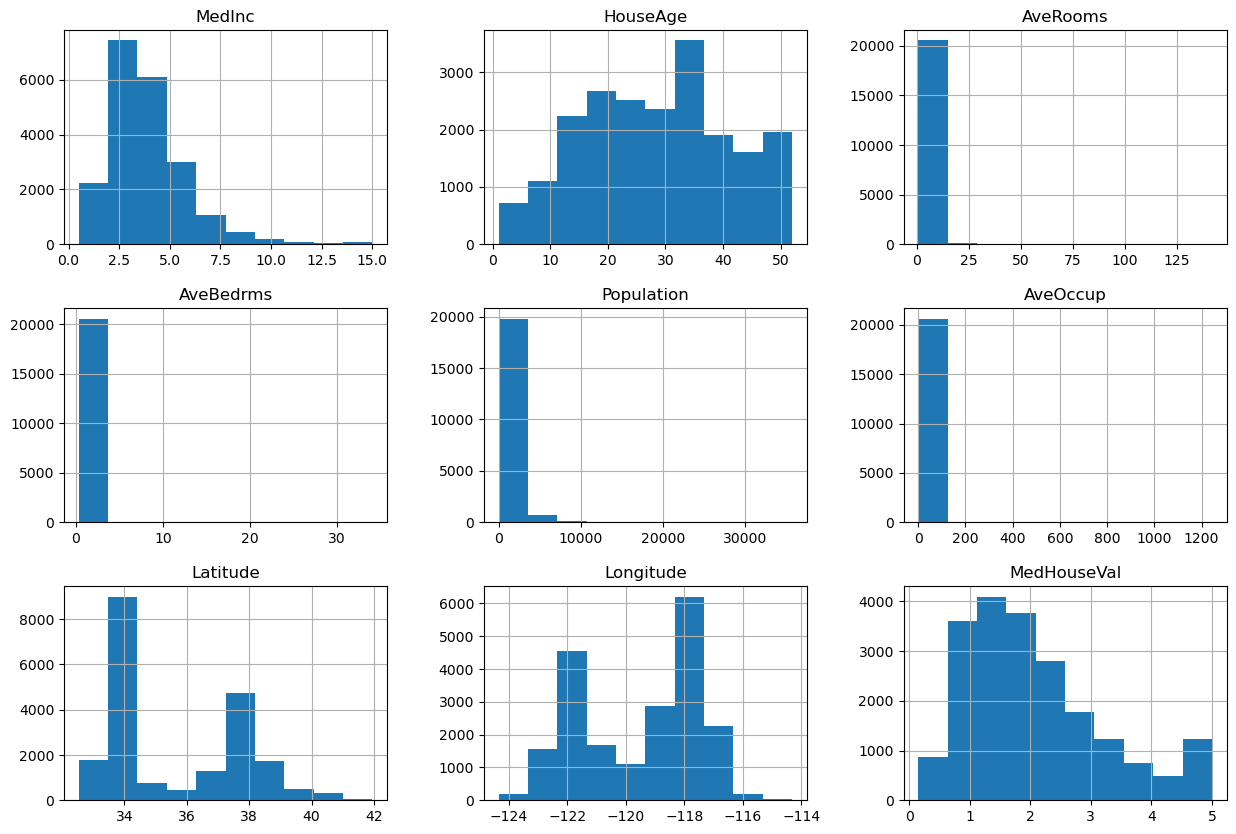

In [3]:
#Ecrivez votre code
df = california_housing.frame
print(df)

df.hist(figsize=(15, 10))
plt.show()

Based on the histogram above, we can see that certain predictors follow normal distribution (MedInc, Longtitude,...). Whereas, some others have positively skewed distribution like Population, AveBedrms, and so on.

## Partie I. Régression linéaire simple

Calculez la matrice de corrélations.

* I.1) Si vous deviez choisir une seule variable pour réaliser une régression linéaire simple, laquelle choisiriez-vous ? Pourquoi ?

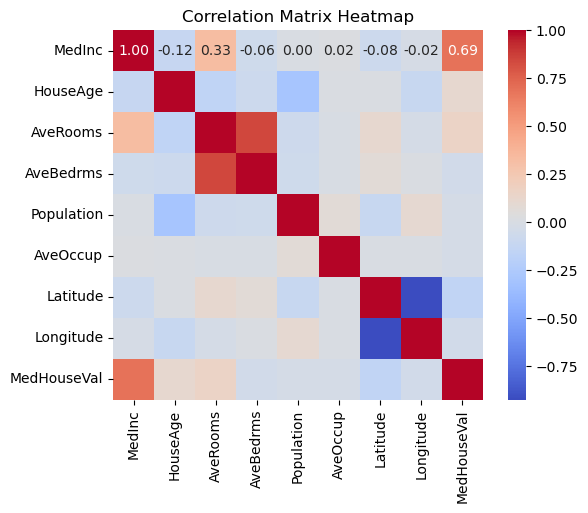

In [4]:
#Ecrivez votre code ici

# Calculate the correlation matrix
corr_matrix = df.corr()

# Heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

**Response**:

As we know, the target variable of this dataset is **MedHouseVal**. To know whether we can choose only one variable to create a simple linear regression is to see the heatmap of the correlation which variable that has the highest absolute value of the correlation with target variable.

In the heatmap above, we can see that the **red color** is **positive correlation** and **blue color** is **negative correlation**.

From the heatmap, we can see that variable **MedInc** seems to has the highest absolute value among others.

Thus, we can create a simple linear regression with the target variable **MedHouseVal** with a variable **MedInc**.

Nous voudrons créer un modèle $ \hat{y} = ax + b $, où $ \hat{y} $ est la prédiction du prix médian des maisons par quartier et $x$ est la caractéristique choisie en I.1.

* I.2) Quelles sont les valeurs optimales de $ a $ et $ b $ ?

**Response**:

We can find the value $a$ and $b$ by using the minimial error:

We have

$$J(a, b) = \sum^n_{i=1}(y_i - ax_i - b)^2$$

To find the minimal, we do the derivative to the smallest value:

$$\frac{\partial J}{\partial b} = \frac{1}{n}\sum^n_{i=1}(y_i - ax_i - b) = 0$$

$$⇒ \frac{1}{n}\sum^n_{i=1}y_i - \frac{a}{n}\sum^n_{i=1}x_i - b = 0$$

$$⇒ \bar{Y} - a \bar{X} - b = 0$$

$$b = \bar{Y} - a\bar{X}$$

and

$$\frac{\partial J}{\partial a} = \frac{1}{n}\sum^n_{i=1}(y_i - ax_i - b)x_i = 0$$

$$⇒ \frac{1}{n}\sum^n_{i=1}y_ix_i - \frac{a}{n}\sum^n_{i=1}x_i^2 - \frac{1}{n}\sum^n_{i=1}x_ib = 0$$

we substitute $b$ in:

$$⇒ \frac{1}{n}\sum^n_{i=1}y_ix_i - \frac{a}{n}\sum^n_{i=1}x_i^2 - \bar{X}(\bar{Y} - a\bar{X}) = 0$$

$$⇒ \frac{1}{n}\sum^n_{i=1}y_ix_i - a\bar{X^2} - \bar{X}\bar{Y} + a\bar{X}^2 = 0$$

$$⇒ \frac{1}{n}\sum^n_{i=1}y_ix_i - \bar{X}\bar{Y} = a(\bar{X^2} - \bar{X}^2)$$

$$a = \frac{cov(x,y)}{S^2_x} = r_{xy}\frac{S_y}{S_x}$$



In [5]:
#Ecrivez votre code ici
from sklearn.linear_model import LinearRegression

#transform X,Y to numpy array as function fit of LinearRegression().fit() takes array as an argument
X = np.asarray(df['MedInc']).reshape(-1,1)
Y = np.asarray(df['MedHouseVal'])

S_x = X.std()
S_y = Y.std()
r_xy = corr_matrix.loc['MedInc', 'MedHouseVal']

X_ = X.mean()
Y_ = Y.mean()

a = r_xy * (S_y / S_x)
b = Y_ - a*X_

# Find by using the model.fit
reg = LinearRegression().fit(X, Y)
a_ = reg.coef_[0]
b_ = reg.intercept_

print("The optimal value of a by formula:", a)
print("The optimal value of b by formula:", b)
print("The optimal value of a by fitting the model:", a_)
print("The optimal value of b by fitting the model:", b_)


The optimal value of a by formula: 0.4179384920189628
The optimal value of b by formula: 0.4508557670326787
The optimal value of a by fitting the model: 0.4179384920189624
The optimal value of b by fitting the model: 0.4508557670326805


* I.3) Quelle est la valeur de $R^2$ ? Est-ce un bon ajustement ? Commentez
* I.4) Tracez la courbe de régression sur le nuage de points entre la sortie désirée et l'entrée

**Response**:

The R-squared value is given by:

$$R^2 = 1 - \frac{\sum_i(y_i - \hat{y_i})^2}{\sum_i(y_i - \bar{y})^2}$$

In [6]:
#define function to compute R^2 (coefficient of determination)
def R_squared(Y_true, Y_hat):
    res = 1 - ((Y_true  - Y_hat)** 2).sum()/((Y_true - Y_true.mean()) ** 2).sum()
    return res

In [7]:
#Ecrivez votre code ici

#split data (one predictor)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, shuffle = True, random_state = 42)

#fit simple linear model
reg = LinearRegression().fit(X_train, Y_train)
Y_pred = reg.predict(X_test)

print("R-squared:", R_squared(Y_test, Y_pred))
print("R-squared by using library:", reg.score(X_test, Y_test)) #reg.score return R^2

R-squared: 0.47293192589970245
R-squared by using library: 0.47293192589970245


**Response**: From the result above, it is not a good adjustment because the $R^2$ is not over 0.8 that we can consider as a good adjustment.

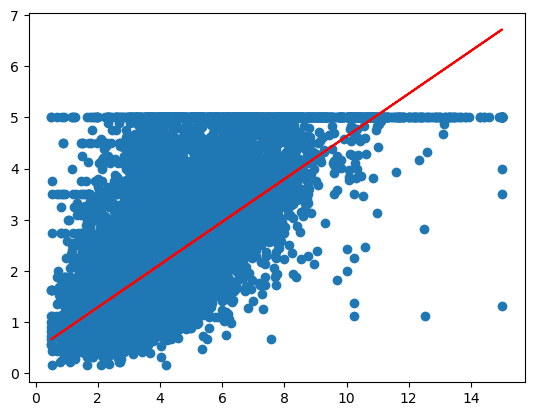

In [8]:
#create basic scatterplot
plt.plot(X, Y, 'o')

# a (slope), b (intercept)
#add linear regression line to scatterplot
plt.plot(X, a*X + b, color = 'red')

* I.5) Quelle est l'erreur RMS de prédiction ? (en moyenne sur toutes les observations)

**Response**:

The mean squared error is given by:

$$MSE = \frac{1}{n}\sum_{i=1}^{n}(Y_i - \hat{Y_i})^2$$

So, the root of mean squared error is given by:
$$RMSE = \sqrt{MSE} =  \sqrt{\frac{1}{n}\sum_{i=1}^{n}(Y_i - \hat{Y_i})^2}$$

In [9]:
#define function to calculate mean squared error
def MSE(Y_true, Y_hat):
    obs = len(Y_true)
    res = 1/obs * ((Y_true - Y_hat)**2).sum()
    return res

#define function to calculate root mean squared error
def RMSE(Y_true, Y_hat):
    return np.sqrt(MSE(Y_true, Y_hat))

In [10]:
#Ecrivez votre code ici
print("The root mean squared error:", RMSE(Y_test, Y_pred))

#Using the library
from sklearn.metrics import mean_squared_error
print("The root mean squared error by using library:", np.sqrt(mean_squared_error(Y_test, Y_pred)))

The root mean squared error: 0.8317439430526982
The root mean squared error by using library: 0.8317439430526982


The error of simple linear regression is really high which suggest a bad prediction, we will see further if other approaches yield an improvement.

## Partie II. Régression multilinéaire

Maintenant réalisez une régression linéaire en utilisant toutes les caractéristiques disponibles.

* II.1) Quelle est l'erreur de prédiction ?
* II.2) Quelle est la valeur de $R^2$ ? L'ajustement est-il meilleur qu'avec une seule variable d'entrée ?
* II.3) Quels sont les coefficients associés aux variables d'entrée, ainsi que le terme indépendant ?

In [11]:
#Ecrivez votre code ici
#drop Y from df
all_X = df.drop(['MedHouseVal'], axis = 1)

#split data (all predictor)
X_train, X_test, Y_train, Y_test = train_test_split(all_X, Y, test_size = 0.3, shuffle = True, random_state = 42)
multi_reg = LinearRegression().fit(X_train, Y_train)
Y_pred = multi_reg.predict(X_test)

RMSE_mult_reg = RMSE(Y_test, Y_pred)
R2_mult_reg = R_squared(Y_test, Y_pred)

print("The mean squared error of the prediction: ", MSE(Y_test, Y_pred))
print("The root mean squared error of the prediction: ", RMSE_mult_reg)
print("The value of R-squared: ", R2_mult_reg)

The mean squared error of the prediction:  0.5305677824766754
The root mean squared error of the prediction:  0.7284008391515453
The value of R-squared:  0.5957702326061664


Response:

After fitting all variables in the model, we can see that the $R^2$ slightly increase that is better than using only one variable, which suggests that the model consists of multiple predictors (X) explains better the target variable (the median of house price).

In [12]:
# Find by using the model.fit
print("Coefficients:", multi_reg.coef_)
print("Intercept (independent term):", multi_reg.intercept_)

Coefficients: [ 4.45822565e-01  9.68186799e-03 -1.22095112e-01  7.78599557e-01
 -7.75740400e-07 -3.37002667e-03 -4.18536747e-01 -4.33687976e-01]
Intercept (independent term): -37.0562413315252


Maintenant nous allons introduire un terme de régularisation, donc la nouvelle fonction de coût est : $$ J' = J + \alpha\sum_{i}{w_i^2} $$
* II.4) Quelle est la valeur optimale du paramètre $\alpha$ ? (Trouvez-la empiriquement)
* II.5) Quelle est l'erreur RMS avec $\alpha$ optimal ?

**Response**:

From the cost function that is given, it has been added the $l_2$ penalization or Ridge penalization

We can write in form:

$$J' = \sum_{i=1}^{n}(y_i - X\cdot w_i)^2 + \alpha\sum^n_{i}{||w_i||^2}$$

where $X = (1, x_1, x_2, ..., x_n)$ and the weight $w_i = (b, a_1, a_2, ..., a_n)$


To find the optimal value of $\alpha$, we can use the K-folds validation.

Algorithm:

We $\mathcal{G} = \{\text{some initial values}\}$

For $\alpha \in \mathcal{G}$
  
$\hspace{1cm}$ For $k$ in $1:K$

$\hspace{2cm}$ Estimate: $w^k_\alpha = \underset{w}{\text{argmin}}||Y^{(-k)} - X^{(-k)} \cdot w||^2 + \alpha||w||^2$

$\hspace{2cm}$ Compute: RMSE($k,\alpha$) = $||Y^{(k)} - X^{(k)} ⋅ w^k_{\alpha}||^2 \frac{1}{|F_k|}$ where $|F_k|$ is #obs in Fold k-th

$\hspace{1cm}$ RMSE($\alpha$) = $\frac{1}{K} \sum^{K}_{i=1} RMSE(k,\alpha)$

Compute $\alpha^⋆$ = $\underset{w}{\text{argmin}}$ RMSE($\alpha$)

From this, we also can compute the $w^{\star}$ by

$$w^{\star} = {\text{argmin}}||Y - X \cdot w||^2 + \alpha^{\star}||w||^2$$

Here we have chosen to implement the function over a grid of
values ranging from $\alpha = 10^{-8}$ to $\alpha = 10^{-2}$ scaled by the standard deviation of $Y$, essentially covering the full range of scenarios from the null model containing only the intercept, to the least squares fit.

In [13]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# define number of folds
nb_fold = 10
kf = KFold(n_splits=nb_fold, shuffle=True, random_state=42)

# define a set of alpha values in a reasonable range
alpha_list = 10**np.linspace(8, -2, 100) / Y_train.std()

# creat array to store MSE
rmse_scores = []

# Perform K-Fold cross-validation on the training data (since we have many observations so we should keep testing data unseen)
for alpha in alpha_list:
    rmse_scores_fold = []
    for train_index, test_index in kf.split(X_train):
        # split data for current k-th fold
        # use .iloc for Pandas DataFrame X_train
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        Y_train_fold, Y_test_fold = Y_train[train_index], Y_train[test_index]

        # fit Ridge Regression model with current alpha and train data at i-th fold
        model = Ridge(alpha=alpha)
        model.fit(X_train_fold, Y_train_fold)

        # make prediction and compute the RMSE for the test data at i-th fold
        Y_pred_fold = model.predict(X_test_fold)
        rmse = RMSE(Y_test_fold, Y_pred_fold)
        rmse_scores_fold.append(rmse)

    # Calculate the mean of the RMSE scores for current alpha
    rmse_scores.append(np.mean(rmse_scores_fold))

# Find the alpha value with the smallest mean MSE

#get index with lowest RMSE
min_ind = np.argmin(rmse_scores)

alpha_opt = alpha_list[min_ind]

print(f"Optimal alpha: {alpha_opt}")

Optimal alpha: 11.689878697208927


In [14]:
# Fit Ridge Regression with optimal alpha
ridge_reg = Ridge(alpha=alpha_opt)
ridge_reg.fit(X_train, Y_train)

# make prediction
Y_pred = ridge_reg.predict(X_test)

RMSE_ridge_reg = RMSE(Y_test, Y_pred)
R2_ridge_reg = R_squared(Y_test, Y_pred)

print(f"Root mean squared error of l2 shrinkage method (Ridge):", RMSE_ridge_reg)
print(f"R squared of l2 shrinkage method (Ridge):", R2_ridge_reg )

Root mean squared error of l2 shrinkage method (Ridge): 0.7279250097098923
R squared of l2 shrinkage method (Ridge): 0.5962981880655107


With $l_2$ regularization, it performs slightly better than the multiple linear regression above.

Ajoutez des variables polynomiales d'ordre $o=2$ aux variables déjà disponibles. Comparez la régression avec et sans régularisation (RMSE, $R^2$)
* II.6) Laquelle donne des meilleurs résultats ? Pourquoi ?  

Scale data to avoid warning from algorithm ("result may not be accurate") when penalize the polynomial regression below.

In [15]:
from sklearn.preprocessing import StandardScaler

#normalize data (centrer et réduit les donnée: (data-u)/sigma)
scaler = StandardScaler()
all_X_scaled = scaler.fit_transform(all_X)
X_scaled_train, X_scaled_test, Y_train, Y_test = train_test_split(all_X_scaled, Y, test_size = 0.3, shuffle = True, random_state = 42)

In [16]:
#Ecrivez votre code ici

from sklearn.preprocessing import PolynomialFeatures

#init polynomial order
order = 2

#generate a new feature matrix consisting of all polynomial combinations of the features
poly = PolynomialFeatures(degree=order)
poly_all_X_train = poly.fit_transform(X_scaled_train)
poly_all_X_test = poly.fit_transform(X_scaled_test)

#fit polynomial regression
poly_reg = LinearRegression().fit(poly_all_X_train, Y_train)

#make prediction
Y_pred = poly_reg.predict(poly_all_X_test)

#store result for comparison later
RMSE_poly_reg = RMSE(Y_test, Y_pred)
R2_poly_reg = R_squared(Y_test, Y_pred)

print("RMSE of Polynomial Regression:", RMSE_poly_reg)
print("R-squared of Polynomial Regression:", R2_poly_reg)

RMSE of Polynomial Regression: 0.6745163730301121
R-squared of Polynomial Regression: 0.653365002122877


In [17]:
from sklearn.preprocessing import StandardScaler

#use (poly_all_X_train) from above then use l2 penalization to fit model
poly_ridge = Ridge(alpha=alpha_opt)
poly_ridge.fit(poly_all_X_train, Y_train)

#make prediction
Y_pred = poly_ridge.predict(poly_all_X_test)

#store result for comparison later
RMSE_poly_ridge = RMSE(Y_test, Y_pred)
R2_poly_ridge = R_squared(Y_test, Y_pred)

print("RMSE of Polynomial Regression (with l2 penalization):", RMSE_poly_ridge)
print("R-squared of Polynomial Regression (with l2 penalization):", R2_poly_ridge)

RMSE of Polynomial Regression (with l2 penalization): 0.6637337462717816
R-squared of Polynomial Regression (with l2 penalization): 0.6643588387758061


### Comparison:

In [18]:
table = {'Multiple Linear Regression': [RMSE_mult_reg, R2_mult_reg],
         'Ridge Regression': [RMSE_ridge_reg, R2_ridge_reg],
         'Polynomial Regression': [RMSE_poly_reg, R2_poly_reg],
         'Polyomial Regression (l2 penalization)': [RMSE_poly_ridge, R2_poly_ridge]}

pd.DataFrame(table, index=["RMSE", "R_squared"])

,Multiple Linear Regression,Ridge Regression,Polynomial Regression,Polyomial Regression (l2 penalization)
RMSE,0.728401,0.727925,0.674516,0.663734
R_squared,0.595770,0.596298,0.653365,0.664359


From the table above, $\textbf{Second-order Polynomial Regression}\hspace{1mm}(l_2)$ is the best among others since it has the $\textbf{lowest RMSE}$ value and the $\textbf{highest}$ $R^2$ (slightly better than Polynomial Regression without penalty). Whereas, the others seem to not have any big or noticeable difference in terms of RMSE and $R^2$. Moreover, we can conclude that for this problem the regularization of a model performs better than the model itself without the regularization.

## Partie III. Régression non linéaire avec réseaux de neurones

Construisez et entraînez un réseau de neurones type Perceptron Multicouche (PMC) à $N_{layer} = 3$ couches et avec $m=5$ neurones dans la couche cachée.

N'oubliez pas de normaliser les données en prétraitement.

In [19]:
#Ecrivez votre code ici
# total_layer = input_layer + hidden_layer + output_layer = 3, hidden = 5

from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

#normalize data (centrer et réduit les donnée: (data-u)/sigma)
scaler = StandardScaler()
all_X_scaled = scaler.fit_transform(all_X)

#init model
m = 5

#we don't split the data since we are evaluating the model's performance on the data it was trained on (question below)
MLP_model = MLPRegressor(hidden_layer_sizes=(m,), max_iter = 500).fit(all_X_scaled, Y) #max_iter = 500 so the algo can converge (300 will send warning)


* III.1) Quelle sont les prix prédits pour les dix premières observations ?
* III.2) Quelle est l'erreur RMS d'apprentissage ?

In [20]:
#Ecrivez votre code ici
Y_pred = MLP_model.predict(all_X_scaled)
print("Predicted prices of the first 10 observations:\n", Y_pred[:10])

Predicted prices of the first 10 observations:
 [4.50047704 4.53403615 4.08707028 3.40886152 2.73155108 2.9757377
 2.73472906 2.84674904 2.13318097 2.79845775]


In [21]:
Y[:10]

array([4.526, 3.585, 3.521, 3.413, 3.422, 2.697, 2.992, 2.414, 2.267,
       2.611])

For the first ten predictions, we can see that there are some noticeable decimal errors (approximately $10^{-1}$) for certain observations, which suggests a good prediction. We will see the error below.

In [22]:
print("The squared root of mean square error of MLP:", RMSE(Y, Y_pred))

The squared root of mean square error of MLP: 0.5931984762984938


Réalisez une validation croisée type *K-Fold* avec $K=10$ (n'oubliez pas de mélanger les données préalablement)

* III.3) Quelle sont les erreurs RMS d'apprentissage et de test ? (Moyenne et écart-type)

In [23]:
#Ecrivez votre code ici
from sklearn.model_selection import KFold, cross_validate

#init
m = 5
nb_fold = 10
kf = KFold(n_splits=nb_fold, shuffle=True)

# fit model and perform K-fold cross validation
mlp_model = MLPRegressor(hidden_layer_sizes=(m,), max_iter=500)
cv = cross_validate(mlp_model, all_X_scaled, Y, cv=kf, return_train_score = True, scoring='neg_root_mean_squared_error')

#multiply the result by -1 since the scoring is -RMSE not RMSE
#np.std already handle negative values so there's no need to multiply by -1 (std is the squared difference)
print("The mean of RMSE of training performance:", -np.mean(cv['train_score']))
print("The standard deviation of RMSE of training performance:", np.std(cv['train_score']))
print("\n")
print("The mean of RMSE of testing performance:", -np.mean(cv['test_score']))
print("The standard deviation of RMSE of testing performance:", np.std(cv['test_score']))

The mean of RMSE of training performance: 0.5987721882706217
The standard deviation of RMSE of training performance: 0.006783083900650291


The mean of RMSE of testing performance: 0.6015246161534762
The standard deviation of RMSE of testing performance: 0.01685381152819777


We can see that the RMSE between training and testing seem to not have much of a difference.

Optimisez le nombre de neurones $m$ dans la couche cachée (Piste : réalisez la validation croisée pour différentes valeurs de $m$)

* III.4) Quelle est la valeur optimale de $m$ ? Pourquoi ?

In [24]:
#Ecrivez votre code ici
# using GridSearch cross-validation from sklearn
from sklearn.model_selection import GridSearchCV

#define range of number of neurons (even increment): [(2,), (4,), ..., (512,)]
m_range = [(2**i,) for i in range(1, 10)]

param_grid = {'hidden_layer_sizes': m_range}
            #   ,'max_iter': [100, 200, 300, 400, 500, 700, 1000]} #comment to avoid long running time (best iter_max found is 400)

mlp = MLPRegressor(max_iter=400)

##scoring: -MSE since the lower the better, so taking negative means that the higher values are considered better
gscv = GridSearchCV(mlp, param_grid, cv = 5, scoring='neg_mean_squared_error') #cv = 5 to avoid long running time
gscv_res = gscv.fit(all_X_scaled, Y)
gscv_res.best_params_

{'hidden_layer_sizes': (64,)}

In [25]:
best_m = gscv_res.best_params_["hidden_layer_sizes"]
print("Optimal m:", best_m[0])

Optimal m: 64


**Response**:

This value was selected after carrying out cross-validation (5 times) for different values of $m$ (number of neurons) in the hidden layer and maximum iteration of 400. Analysis of the model's performance shows that the given $m$ has the lowest average MSE score of all the values.


Pour une validation-croisée type K-Fold avec $K=10$ (mélangez l'ordre des observations), remplissez le tableau de RMSE de test ci-dessous selon les différents types de régression.

| Type de régression | Fold 1 | Fold 2 | Fold 3 | Fold 4 | Fold 5 | Fold 6 | Fold 7 | Fold 8 | Fold 9 | Fold 10 |
|--------------------|---------|--------|--------|-------|--------|-------|---------|--------|--------|---------|
| Linéaire simple    |  |  |  |  |  |  |  |  |  |  |
| Multilinéaire sans régul.    |  |  |  |  |  |  |  |  |  |  |
| Multilinéaire avec régul.    |  |  |  |  |  |  |  |  |  |  |
| Polynomiale sans régul.    |  |  |  |  |  |  |  |  |  |  |
| Polynomiale avec régul.    |  |  |  |  |  |  |  |  |  |  |
| Non linéaire avec NN    |  |  |  |  |  |  |  |  |  |  |

* III.5) Quelle est la méthode de régression la plus adaptée pour ce problème ? Justifiez


In [26]:
#https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter (metric for cv)

nb_fold = 10
kf = KFold(n_splits=nb_fold, shuffle=True)
poly_all_X = poly.fit_transform(all_X_scaled)

reg = LinearRegression()
mul_reg = LinearRegression()
mul_reg_regul = Ridge(alpha=alpha_opt)
poly_reg = LinearRegression()
poly_reg_regul = Ridge(alpha=alpha_opt)
mlp = MLPRegressor(hidden_layer_sizes=(best_m[0],), max_iter=400)

cv_reg = cross_validate(reg, X, Y, cv=kf, scoring='neg_root_mean_squared_error')
cv_mul_reg = cross_validate(mul_reg, all_X, Y, cv=kf, scoring='neg_root_mean_squared_error')
cv_mul_reg_regul = cross_validate(mul_reg_regul, all_X, Y, cv=kf, scoring='neg_root_mean_squared_error')
cv_poly_reg = cross_validate(poly_reg, poly_all_X, Y, cv=kf, scoring='neg_root_mean_squared_error')
cv_poly_reg_regul = cross_validate(poly_reg_regul, poly_all_X, Y, cv=kf, scoring='neg_root_mean_squared_error')
cv_mlp = cross_validate(mlp, all_X_scaled, Y, cv=kf, scoring='neg_root_mean_squared_error')

# multiply by -1 because scoring is negative RMSE
reg_RMSE = -cv_reg['test_score']
mul_reg_RMSE  = -cv_mul_reg['test_score']
mul_reg_regul_RMSE = -cv_mul_reg_regul['test_score']
poly_reg_RMSE = -cv_poly_reg['test_score']
poly_reg_regul_RMSE = -cv_poly_reg_regul['test_score']
mlp_RMSE = -cv_mlp['test_score']

In [27]:
#save all RMSE in dictionary
table = {
    'Simple Linear Regression': reg_RMSE,
    'Multiple Linear Regression': mul_reg_RMSE,
    'Multiple Linear Regression (l2 penalization)': mul_reg_regul_RMSE,
    'Polynomial Regression': poly_reg_RMSE,
    'Polynomial Regression (l2 penalization)': poly_reg_regul_RMSE,
    'Neural Network (Multilayer Perceptron)': mlp_RMSE
}

#create an array contain column names: ['Fold 1',...,'Fold 10']
col_name = []
for i in range(1, nb_fold + 1):
    col_name.append("Fold " + str(i))

#print the result as dataframe
pd.DataFrame(table, index=col_name)

,Simple Linear Regression,Multiple Linear Regression,Multiple Linear Regression (l2 penalization),Polynomial Regression,Polynomial Regression (l2 penalization),Neural Network (Multilayer Perceptron)
Fold 1,0.845988,0.720919,0.756519,0.735500,1.056071,0.551664
Fold 2,0.827290,0.695655,0.722414,0.679424,0.647340,0.523069
Fold 3,0.827214,0.747503,0.691994,0.725076,1.860859,0.563393
Fold 4,0.831510,0.764841,0.694364,0.700063,0.649092,0.561645
Fold 5,0.856065,0.723872,0.708727,0.645809,0.971532,0.535916
Fold 6,0.843606,0.768431,0.747232,0.686284,0.658057,0.514800
Fold 7,0.888555,0.723110,0.736388,0.689851,0.642261,0.505541
Fold 8,0.829836,0.680786,0.749004,1.194991,0.630955,0.591836
Fold 9,0.830101,0.717322,0.734675,0.702368,0.703663,0.557556
Fold 10,0.790409,0.725989,0.725079,0.660417,0.711248,0.517467


While RMSE can normally exceed 1, the table above suggests inconsistency across folds; for example, weird behaviour of RMSE of Polynomial Regression might indicate that the model is not very robust and is overfitting to certain folds of the data, so it may perform well on some folds but poorly on others.

In [28]:
# print the mean of RMSE of each model
print("RMSE mean of simple linear regression:", np.mean(reg_RMSE))
print("RMSE mean of multiple linear regression:", np.mean(mul_reg_RMSE))
print("RMSE mean of multiple linear regression (with l2 penalization):", np.mean(mul_reg_regul_RMSE))
print("RMSE mean of polynomial regression:", np.mean(poly_reg_RMSE))
print("RMSE mean of polynomial regression (with l2 penalization):", np.mean(poly_reg_regul_RMSE))
print("RMSE mean of non linear regression with neural network (Multilayer Perceptron):", np.mean(mlp_RMSE))

RMSE mean of simple linear regression: 0.8370575293459263
RMSE mean of multiple linear regression: 0.7268426059520854
RMSE mean of multiple linear regression (with l2 penalization): 0.7266397237138585
RMSE mean of polynomial regression: 0.7419783521963527
RMSE mean of polynomial regression (with l2 penalization): 0.8531076673289784
RMSE mean of non linear regression with neural network (Multilayer Perceptron): 0.5422887964630461


According to the table above, we can conclude that the non linear regression with neural network performs the best since each fold it has the smallest RMSE. Also, by the mean value above it has a very low RMSE compared to others.